<a href="https://colab.research.google.com/github/preetamjumech/Weights_of_Evidence/blob/main/Weights_of_Evidence_31_12_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {'credit_score': [650, 720, 580, 690, 710, 680, 620, 730],
        'employment_status': ['employed', 'unemployed', 'employed', 'employed', 'unemployed', 'employed', 'unemployed', 'employed'],
        'age': [25, 34, 45, 23, 56, 37, 29, 41],
        'default': [0, 0, 1, 0, 0, 1, 1, 0]}

df = pd.DataFrame(data)
df.head()

,credit_score,employment_status,age,default
0,650,employed,25,0
1,720,unemployed,34,0
2,580,employed,45,1
3,690,employed,23,0
4,710,unemployed,56,0


In [2]:
def calculate_woe(df, feature, target):
    df = df[[feature, target]]
    total_good = df[target].sum()
    total_bad = df[target].count() - total_good
    feature_woe = df.groupby(feature).agg({target: ['sum', 'count']})
    feature_woe.columns = ['good', 'total']
    feature_woe['bad'] = feature_woe['total'] - feature_woe['good']
    feature_woe['woe'] = np.log((feature_woe['good'] / total_good) / (feature_woe['bad'] / total_bad))
    return feature_woe['woe']

# Calculate WoE for employment_status
woe_employment_status = calculate_woe(df, 'employment_status', 'default')
print(woe_employment_status)

# Apply WoE to the dataset
df['employment_status_woe'] = df['employment_status'].map(woe_employment_status)
df.head()

employment_status
employed      0.105361
unemployed   -0.182322
Name: woe, dtype: float64


,credit_score,employment_status,age,default,employment_status_woe
0,650,employed,25,0,0.105361
1,720,unemployed,34,0,-0.182322
2,580,employed,45,1,0.105361
3,690,employed,23,0,0.105361
4,710,unemployed,56,0,-0.182322


In [3]:
# Features and target
X = df[['credit_score', 'employment_status_woe', 'age']]
y = df['default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [5]:
# Evaluate using ROC AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {auc}')

ROC AUC Score: 0.5


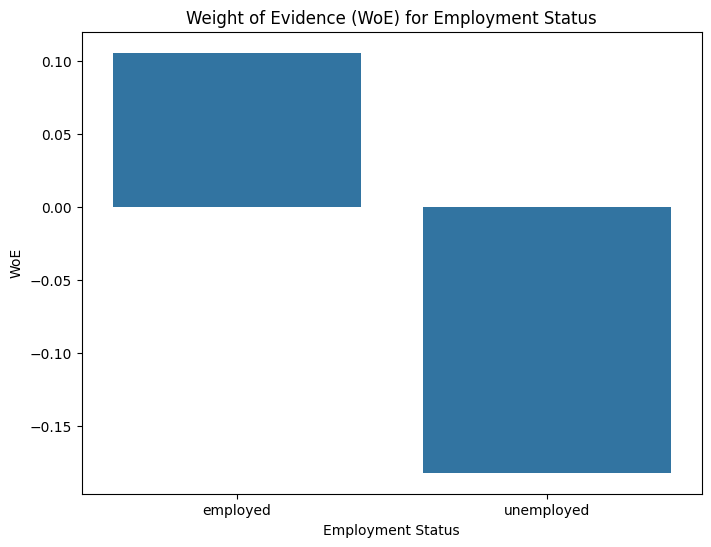

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x=woe_employment_status.index, y=woe_employment_status.values)
plt.title('Weight of Evidence (WoE) for Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('WoE')
plt.show()

# Testing

In [6]:
import pandas as pd

data = {
    'employment_status': ['employed', 'unemployed', 'employed', 'employed', 'unemployed', 'employed', 'unemployed', 'employed'],
    'default': [0, 0, 1, 0, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

In [7]:
df = df[['employment_status', 'default']]
df

,employment_status,default
0,employed,0
1,unemployed,0
2,employed,1
3,employed,0
4,unemployed,0
5,employed,1
6,unemployed,1
7,employed,0


In [8]:
total_good = df['default'].sum()
total_bad = df['default'].count() - total_good
print(total_good, total_bad)

3 5


In [9]:
df['default'].sum()

3

In [10]:
df['default'].count()

8

In [13]:
feature_woe = df.groupby('employment_status').agg({'default': ['sum', 'count']})
feature_woe.columns = ['good', 'total']
feature_woe

,good,total
employment_status,,
employed,2,5
unemployed,1,3


In [15]:
feature_woe['bad'] = feature_woe['total'] - feature_woe['good']
feature_woe

,good,total,bad
employment_status,,,
employed,2,5,3
unemployed,1,3,2


In [16]:
feature_woe['woe'] = np.log((feature_woe['good'] / total_good) / (feature_woe['bad'] / total_bad))
feature_woe

,good,total,bad,woe
employment_status,,,,
employed,2,5,3,0.105361
unemployed,1,3,2,-0.182322
